## Project Name : Audio Processing using ML

### In this project we will be understanding and extracting different features from audio files which help us in performing ML operations on these audio files.


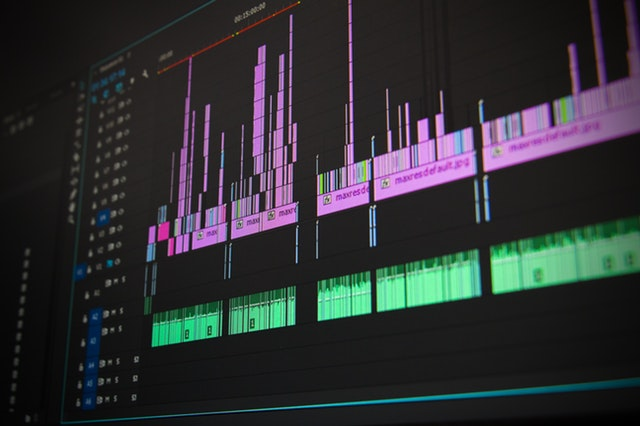

### Time Line of the project :
- Importing libraties and audio file
- Understanding our audio file
- Extracting Time Domain Audio Features
- Fourier Transform and it's applications
- Extracting Frequency Domain Audio Features

Installing Librosa library

In [ ]:
! pip install librosa

In [ ]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

Loading our Audio File

In [ ]:
ipd.Audio('file_example_WAV_2MG.wav')

#### Reading our file with Librosa library

In [ ]:
music , sr = librosa.load('file_example_WAV_2MG.wav')

In [ ]:
print("Shape of the audio file: ",music.shape)
print("Sample Rate of the audio file: ",sr)

Duration of one sample in seconds

In [ ]:
sample_duration = 1 / sr
print(f"Duration of one sample is {sample_duration:6f} seconds")

In [ ]:
# total number of samples in audio file
tot_samples = len(music)
tot_samples

If we want to find out duration in seconds

In [ ]:
duration = 1 / sr * tot_samples
print(f"Duration of whole audio is {duration} seconds")

Visualising audio signal in the time domain

In [ ]:
plt.figure(figsize=(30, 10))

librosa.display.waveplot(music, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Sample music")

### Extracting Time Domain Audio Features

The different types of time domain features are:
- Amplitude Envelope
- Zero Crossing Rate
- Root Mean Square Enerergy

### Amplitude Envelope : 

AE is the maximum value of all the samples in a frame

Calculating an Amplitude Envelope

In [ ]:
FRAME_SIZE = 1024
HOP_LENGTH = 512  ### used for overlapping frames

def amplitude_envelope(signal, frame_size, hop_length):
    amplitude_envelope = []
    
    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length): 
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) 
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope)

In [ ]:
AE_music = amplitude_envelope(music, FRAME_SIZE, HOP_LENGTH)

If we want to see how many frames have been produced

In [ ]:
print("The total number of frames produced : ",len(AE_music))

Visualising the AE

In [ ]:
frames = range(len(AE_music))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(30, 10))

librosa.display.waveplot(music, alpha=0.5)
plt.plot(t, AE_music, color="r")
plt.ylim((-1, 1))
plt.title("Sample music")

#### Applications of Amplitude Envelope :
- Gives max amplitude values in a frame
- Gives a rough idea of loudness
- Used for music genre classification or onset detection


### Zero Crossing Rate :

The is the rate at which a signal crosses the negative value to zero and then to a possitive value

In [ ]:
ZCR_music = librosa.feature.zero_crossing_rate(music, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [ ]:
frames = range(len(ZCR_music))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

In [ ]:
plt.figure(figsize=(30, 10))

plt.plot(t, ZCR_music, color="b")

#### Applications of Zero Crossing Rate :
- Can be used for recursive v/s pitch sounds
- To find out voice/unvoice decisions
- Can be used to find out monophonic pitch

### Root Mean Square Energy :

This is basically the root mean square of all the samples present in a frame

In [ ]:
RMS_music = librosa.feature.rms(music, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

Visualising the RMS 

In [ ]:
frames = range(len(RMS_music))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(30, 10))

librosa.display.waveplot(music, alpha=0.5)
plt.plot(t, RMS_music, color="r")
plt.ylim((-1, 1))
plt.title("Sample music")

#### Applications of RMS Energy :
- Gives RMS of all samples
- This is also an indicator of loudness
- Can be used for audio segementation or music genre classification

### Fourier Transform and it's applications

Fourier Transform : A Fourier transform is a mathematical transform that decomposes functions depending on space or time into functions depending on spatial or temporal frequency, such as the expression of a musical chord in terms of the volumes and frequencies of its constituent notes

#### Applications of Fourier Transform :
- Spectogram
- Mel Frequency Cepstral Coefficients

#### Applying Fourier Transform i.e plotting frequency spectrum

In [ ]:
fft_music = np.fft.fft(music)
len(fft_music)

In [ ]:
def plot_magnitude_spectrum(signal, sr, title, f_ratio=1):
    fft_music = np.fft.fft(signal)
    fft_abs = np.absolute(fft_music)
    
    plt.figure(figsize=(18, 5))
    
    f = np.linspace(0, sr, len(fft_abs))
    f_bins = int(len(fft_abs)*f_ratio)  
    
    plt.plot(f[:f_bins], fft_abs[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.title(title)

In [ ]:
plot_magnitude_spectrum(music, sr, "Sample Music", 1)

#### Plotting a spectogram

In [ ]:
### extracting short time fourier transform

FRAME_SIZE = 2048
HOP_SIZE = 512

ssft = librosa.stft(music, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [ ]:
type(ssft[0][0])

We only want absolute values

In [ ]:
ssft_abs = np.abs(ssft) ** 2
type(ssft_abs[0][0])

Visualizing

In [ ]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

In [ ]:
plot_spectrogram(ssft_abs, sr, HOP_SIZE)

This is because our audio file have low frequencies

In [ ]:
### converting to log
sfft_abs_log = librosa.power_to_db(sfft_abs)
plot_spectrogram(sfft_abs_log, sr, HOP_SIZE,y_axis='log')

#### Calculating Mel Frequency Cepstral Coefficients

In sound processing, the mel-frequency cepstrum is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency. Mel-frequency cepstral coefficients are coefficients that collectively make up an MFC.

Extracting MFCCs

In [ ]:
mfccs = librosa.feature.mfcc(y=music, n_mfcc=13, sr=sr)

Extracting 1st and 2nd order MFCCs

In [ ]:
delta_mfccs = librosa.feature.delta(mfccs)

In [ ]:
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

Visualizing MFCCs

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.title('MFCCS')
plt.show()

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta_mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.title('1st order MFCCs')
plt.show()

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta2_mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.title('2nd order MFCCs')
plt.show()

### Advanced or Frequency Domain Audio Features

Different types of Frequency Domain Audio Features are :
- Band Energy Ratio
- Spectral Centroid

#### Band Energy Ratio :

Ratio of lower frequency bands to higher frequency bands

It is used in comparison of energy in lower/higher frequency bands and it also measures how dominat low frequencies are

Application of Band Energy Ratio :
- Music and Speech determination
- Music classification

#### Spectral Centroid :

The spectral centroid is a measure used in digital signal processing to characterise a spectrum. It indicates where the center of mass of the spectrum is located. Perceptually, it has a robust connection with the impression of brightness of a sound.

It is a measure of the brightness of the sound


Calculates the weighted mean of frequencies

Application of Spectral Centroid:
- Music Classification
- Audio Classification